In [1]:
import numpy as np
import pandas as pd
import os, sys
import matplotlib.pyplot as plt
import xlwt
from xlwt import Workbook
import scipy.stats as st
import scipy
import statistics as stat

In [5]:
def create_fastCN_summary_from_file(sample):
    # initializes chr_dict
    # key = chromosome number
    # value = list of two elements: # of duplications, total bp of duplications
    chr_dict = {}
    bad_chro = ["chrUn", "chrY", "chrM"] 
    # opens chrom sizes for %
    e = open("{}.sorted.chrom.sizes".format(sample), 'rt')
    chromFile = e.readlines()
    chr_size_dict = {}
    for line in chromFile:
        line = line.rstrip().split()
        chro = line[0]
        size = int(line[1])
        if "chrUn" in chro or "scaffold" in chro or "CTF" in chro:
            if "chrUn" not in chr_size_dict.keys():
                chr_size_dict["chrUn"] = size
            else:
                chr_size_dict["chrUn"] += size
        elif "chrY" in chro:
            if "chrY" not in chr_size_dict.keys():
                chr_size_dict["chrY"] = size
            else:
                chr_size_dict["chrY"] += size
        elif "chrM" in chro:
            if "chrM" not in chr_size_dict.keys():
                chr_size_dict["chrM"] = size
            else:
                chr_size_dict["chrM"] += size
        else:
            chr_size_dict[chro] = size
            
        if chro not in bad_chro:
            if "total" not in chr_size_dict.keys():
                chr_size_dict["total"] = size
            else:
                chr_size_dict["total"] += size
            
        if "total_all" not in chr_size_dict.keys():
            chr_size_dict["total_all"] = size
        else:
            chr_size_dict["total_all"] += size
            
        if "chrY" not in chr_size_dict.keys():
            chr_size_dict["chrY"] = 1
        if "chrUn" not in chr_size_dict.keys():
            chr_size_dict["chrUn"] = 1
        if "chrM" not in chr_size_dict.keys():
            chr_size_dict["chrM"] = 1
    e.close()
    
    
    # fills in keys for chr_dict, alters first value of list per dup present 
    f = open("{}_fastCN_segdups.bed".format(sample), 'rt')
    inFile = f.readlines()
    for line in inFile:
        line = line.rstrip().split()
        chro = line[0]
        size = int(line[2]) - int(line[1])
        if size < 10000:
            continue
        if "chrUn" in chro or "scaffold" in chro or "CTF" in chro:
            chro = "chrUn"
        if "chrY" in chro:
            continue
        if "chrM" in chro:
            chro = "chrM"
        dup_size = int(line[2]) - int(line[1])
        if chro not in chr_dict.keys():
            chr_dict[chro] = [0, 0, 0]
        chr_dict[chro][0] += 1
        chr_dict[chro][1] += dup_size
    f.close()
    
    for key, values in chr_dict.items():
        values[2] = round(values[1] / chr_size_dict[key], 5) * 100

    # creates one more key: "total" for all dups, all bp
    total_dups = 0
    total_bp = 0
    total_all_dups = 0
    total_all_bp = 0
    for chro, values in chr_dict.items():
        if chro not in bad_chro:
            total_dups += values[0]
            total_bp += values[1]
        total_all_dups += values[0]
        total_all_bp += values[1]
        
    total_percent = round(total_bp / chr_size_dict["total"], 4) * 100
    total_all_percent = round(total_all_bp / chr_size_dict["total_all"], 4) * 100
    
    chr_dict["total"] = [total_dups, round(total_bp/1000000, 2), total_percent]
    chr_dict["total_all"] = [total_all_dups, round(total_all_bp/1000000, 2), total_all_percent]
    
    return chr_dict

In [6]:
UU_Cfam = create_fastCN_summary_from_file("mischka")

In [7]:
UU_Cfam

{'chr1': [71, 2527192, 2.045],
 'chr10': [18, 1381242, 1.955],
 'chr11': [33, 3165450, 4.232],
 'chr12': [22, 495197, 0.679],
 'chr13': [23, 1009638, 1.5699999999999998],
 'chr14': [24, 1308979, 2.1420000000000003],
 'chr15': [24, 1130470, 1.748],
 'chr16': [38, 2980691, 4.938],
 'chr17': [37, 1836729, 2.822],
 'chr18': [44, 3015387, 5.34],
 'chr19': [28, 1393858, 2.511],
 'chr2': [33, 3107130, 3.656],
 'chr20': [34, 1242013, 2.118],
 'chr21': [37, 2059170, 3.9800000000000004],
 'chr22': [16, 365034, 0.5930000000000001],
 'chr23': [17, 628959, 1.184],
 'chr24': [26, 1090682, 2.246],
 'chr25': [15, 1242979, 2.403],
 'chr26': [33, 3395907, 8.649999999999999],
 'chr27': [38, 1308216, 2.804],
 'chr28': [14, 411701, 0.987],
 'chr29': [8, 284280, 0.6689999999999999],
 'chr3': [22, 808189, 0.874],
 'chr30': [13, 592577, 1.458],
 'chr31': [15, 792923, 1.9869999999999999],
 'chr32': [7, 381898, 0.9490000000000001],
 'chr33': [11, 511586, 1.592],
 'chr34': [10, 650290, 1.534],
 'chr35': [14, 120

In [8]:
chr_xticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,"X"]

In [9]:
chr_list = ['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chr23',
 'chr24',
 'chr25',
 'chr26',
 'chr27',
 'chr28',
 'chr29',
 'chr30',
 'chr31',
 'chr32',
 'chr33',
 'chr34',
 'chr35',
 'chr36',
 'chr37',
 'chr38',
 'chrX']

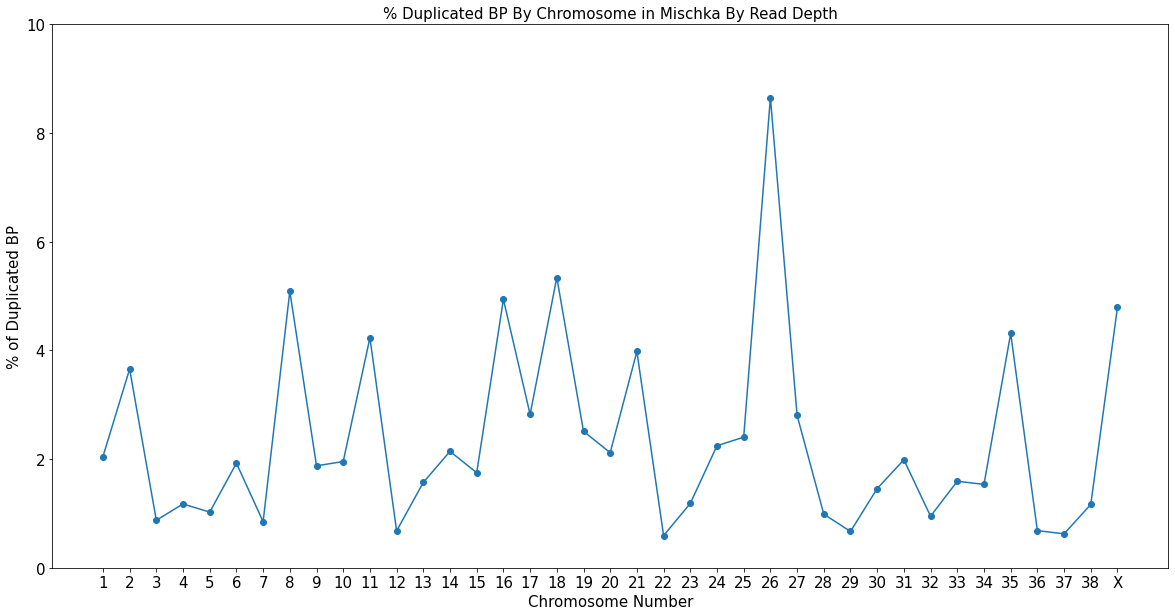

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(20,10))
ax.set_ylim(top = 10)

sample_scatter = []
for chro in chr_list:
    sample_scatter.append(UU_Cfam[chro][2])
    
chr_count = []
for i in range(len(chr_list)):
    chr_count.append(i + 1)
    
ax.plot(chr_count, sample_scatter, marker = 'o')
#ax.legend(loc = 'upper left', prop={'size': 15})

# set labels for chro
plt.xticks(np.arange(min(chr_count), max(chr_count)+1, 1.0), chr_xticks)

ax.set_title("% Duplicated BP By Chromosome in Mischka By Read Depth")
ax.set_xlabel("Chromosome Number")
ax.set_ylabel("% of Duplicated BP")
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
     ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

In [11]:
e = open("mischka.sorted.chrom.sizes", 'rt')
chromFile = e.readlines()
chr_size_dict = {}
for line in chromFile:
    line = line.rstrip().split()
    chro = line[0]
    size = int(line[1])
    if "chrUn" in chro or "scaffold" in chro or "CTF" in chro:
        if "chrUn" not in chr_size_dict.keys():
            chr_size_dict["chrUn"] = size
        else:
            chr_size_dict["chrUn"] += size
    elif "chrY" in chro:
        if "chrY" not in chr_size_dict.keys():
            chr_size_dict["chrY"] = size
        else:
            chr_size_dict["chrY"] += size
    elif "chrM" in chro:
        if "chrM" not in chr_size_dict.keys():
            chr_size_dict["chrM"] = size
        else:
            chr_size_dict["chrM"] += size
    else:
        chr_size_dict[chro] = size

    if "total" not in chr_size_dict.keys():
        chr_size_dict["total"] = size
    else:
        chr_size_dict["total"] += size

    if "chrY" not in chr_size_dict.keys():
        chr_size_dict["chrY"] = 1
    if "chrUn" not in chr_size_dict.keys():
        chr_size_dict["chrUn"] = 1
    if "chrM" not in chr_size_dict.keys():
        chr_size_dict["chrM"] = 1
e.close()

In [12]:
chr_size_dict

{'chr1': 123556469,
 'total': 2488728686,
 'chrY': 6728607,
 'chrUn': 128440655,
 'chrM': 16729,
 'chr10': 70643054,
 'chr11': 74805798,
 'chr12': 72970719,
 'chr13': 64299765,
 'chr14': 61112200,
 'chr15': 64676183,
 'chr16': 60362399,
 'chr17': 65088165,
 'chr18': 56472973,
 'chr19': 55516201,
 'chr2': 84979418,
 'chr20': 58627490,
 'chr21': 51742555,
 'chr22': 61573679,
 'chr23': 53134997,
 'chr24': 48566227,
 'chr25': 51730745,
 'chr26': 39257614,
 'chr27': 46662488,
 'chr28': 41733330,
 'chr29': 42517134,
 'chr3': 92479059,
 'chr30': 40643782,
 'chr31': 39901454,
 'chr32': 40225481,
 'chr33': 32139216,
 'chr34': 42397973,
 'chr35': 28051305,
 'chr36': 31223415,
 'chr37': 30785915,
 'chr38': 24803098,
 'chr4': 89535178,
 'chr5': 89562946,
 'chr6': 78113029,
 'chr7': 81081596,
 'chr8': 76405709,
 'chr9': 61171909,
 'chrX': 124992030}

In [13]:
autosomes = ['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chr23',
 'chr24',
 'chr25',
 'chr26',
 'chr27',
 'chr28',
 'chr29',
 'chr30',
 'chr31',
 'chr32',
 'chr33',
 'chr34',
 'chr35',
 'chr36',
 'chr37',
 'chr38']

In [18]:
f = open("mischka_fastCN_segdups.bed", 'rt')
inFile = f.readlines()
start_cent = 0
end_cent = 0
mischka_38 = []
mischka_10kb = []
for line in inFile:
    line = line.rstrip().split()
    if line[0] in chr_list and line[0] != "chrX":
        if int(line[1]) < 1000000:
            start_cent += 1
        elif int(line[2]) > (chr_size_dict[line[0]] - 1000000):
            end_cent += 1
    dup = [line[0], line[1], line[2]]
    if line[0] in autosomes:
        mischka_38.append(dup)
    size = int(line[2]) - int(line[1])
    if size >= 10000 and (line[0] in autosomes or line[0] == "chrX"):
        mischka_10kb.append(dup)
f.close
print(start_cent, end_cent)

60 41


In [19]:
len(mischka_10kb)

1033

In [15]:
f = open("mischka_38_segdups.bed", 'w')
for item in mischka_38:
    f.write("\t".join(item) + '\n')
f.close()

In [20]:
f = open("mischka_10kb_segdups.bed", 'w')
for item in mischka_10kb:
    f.write("\t".join(item) + '\n')
f.close()

In [21]:
segdup_cnlist = {}
segdup_cnlist_sizes = {}
f = open("mischka_fastCN10kbsegdups_CN_intersect.bed", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip().split()
    if line[4] not in chr_list:
        continue
    dup = (line[4], line[5], line[6])
    if dup not in segdup_cnlist.keys():
        segdup_cnlist[dup] = []
    segdup_cnlist[dup].append(float(line[3]))
    
    dup_size = (int(line[6]) - int(line[5]))
    segdup_cnlist_sizes[dup] = dup_size
f.close()
segdup_cnlist

{('chr1', '319248', '336899'): [2.8233977034529874,
  2.8476059207573843,
  2.939136592788893,
  2.554773098804767],
 ('chr1', '4599957', '4615223'): [3.8638851821345166,
  7.338047344227158,
  6.822877274335291,
  2.883212391010235],
 ('chr1', '4636104', '4654924'): [9.054533405924182,
  6.117242622746042,
  10.923280192127281,
  7.264920268899096,
  8.289361386754218,
  8.607906577410898,
  4.22813791371619],
 ('chr1', '5734457', '5747619'): [2.7601155033683127,
  2.5716896173731882,
  2.8181587512980784,
  2.5361343990673046],
 ('chr1', '12356824', '12381126'): [2.8017044326905434,
  3.438331617298754,
  2.9224421231199416,
  2.5769275406307925,
  2.583527981143528],
 ('chr1', '13466133', '13477550'): [7.696882963655087,
  15.106197876404194,
  7.985310143810102,
  2.858036560097289],
 ('chr1', '25521320', '25534458'): [3.063717568333049,
  8.360877787658586,
  5.3005151962103145,
  2.836505083435935],
 ('chr1', '25848051', '25870223'): [3.0552773951342647,
  3.7530033954414868,
  4

In [22]:
segdup_cnlist_sizes

{('chr1', '319248', '336899'): 17651,
 ('chr1', '4599957', '4615223'): 15266,
 ('chr1', '4636104', '4654924'): 18820,
 ('chr1', '5734457', '5747619'): 13162,
 ('chr1', '12356824', '12381126'): 24302,
 ('chr1', '13466133', '13477550'): 11417,
 ('chr1', '25521320', '25534458'): 13138,
 ('chr1', '25848051', '25870223'): 22172,
 ('chr1', '25879594', '25992555'): 112961,
 ('chr1', '36274717', '36289552'): 14835,
 ('chr1', '37484025', '37498264'): 14239,
 ('chr1', '38004274', '38027275'): 23001,
 ('chr1', '41033318', '41047118'): 13800,
 ('chr1', '44492830', '44519583'): 26753,
 ('chr1', '44523345', '44546287'): 22942,
 ('chr1', '51930758', '51948625'): 17867,
 ('chr1', '54634512', '54650866'): 16354,
 ('chr1', '56085833', '56097924'): 12091,
 ('chr1', '60105689', '60133007'): 27318,
 ('chr1', '60135643', '60162569'): 26926,
 ('chr1', '64333685', '64351689'): 18004,
 ('chr1', '70331029', '70364069'): 33040,
 ('chr1', '70978921', '71021696'): 42775,
 ('chr1', '71913815', '71929527'): 15712,
 

In [23]:
len(segdup_cnlist_sizes)

1033

In [24]:
max(segdup_cnlist_sizes.values()), min(segdup_cnlist_sizes.values())

(1610191, 10000)

In [25]:
stat.mean(segdup_cnlist_sizes.values()), stat.median(segdup_cnlist_sizes.values())

(54414.230396902225, 24455)

Text(0, 0.5, 'Number of Unique Duplications')

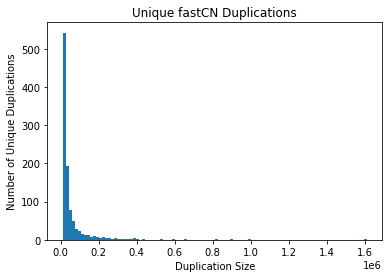

In [26]:
fig, ax = plt.subplots(1, 1)
ax.hist(segdup_cnlist_sizes.values(), bins = 100)
#ax.set_ylim(0, 1600)
ax.set_title("Unique fastCN Duplications")
ax.set_xlabel("Duplication Size")
ax.set_ylabel("Number of Unique Duplications")

Text(0, 0.5, 'Number of Unique Duplications')

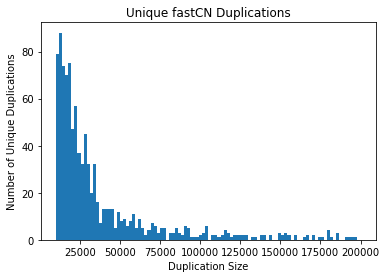

In [27]:
fig, ax = plt.subplots(1, 1)
ax.hist(segdup_cnlist_sizes.values(), bins = 100, range = (10000,200000))
#ax.set_ylim(0, 1600)
ax.set_title("Unique fastCN Duplications")
ax.set_xlabel("Duplication Size")
ax.set_ylabel("Number of Unique Duplications")

In [28]:
segdup_cnlist_medians = {}
for dup, cn_list in segdup_cnlist.items():
    segdup_cnlist_medians[dup] = stat.median(cn_list)
segdup_cnlist_medians

{('chr1', '319248', '336899'): 2.8355018121051856,
 ('chr1', '4599957', '4615223'): 5.343381228234904,
 ('chr1', '4636104', '4654924'): 8.289361386754218,
 ('chr1', '5734457', '5747619'): 2.6659025603707507,
 ('chr1', '12356824', '12381126'): 2.8017044326905434,
 ('chr1', '13466133', '13477550'): 7.841096553732594,
 ('chr1', '25521320', '25534458'): 4.182116382271682,
 ('chr1', '25848051', '25870223'): 4.014680419272437,
 ('chr1', '25879594', '25992555'): 4.313123062628577,
 ('chr1', '36274717', '36289552'): 2.567334407620014,
 ('chr1', '37484025', '37498264'): 2.666105028068399,
 ('chr1', '38004274', '38027275'): 2.5749014167674735,
 ('chr1', '41033318', '41047118'): 2.6227531796744876,
 ('chr1', '44492830', '44519583'): 2.556936419692998,
 ('chr1', '44523345', '44546287'): 2.630248342852375,
 ('chr1', '51930758', '51948625'): 2.544115362537994,
 ('chr1', '54634512', '54650866'): 2.540584074454224,
 ('chr1', '56085833', '56097924'): 2.7291254702482686,
 ('chr1', '60105689', '60133007'

In [29]:
len(segdup_cnlist_medians)

1033

In [30]:
f = open("mischka.fastCN_segdup_CN_10kb.bed", 'w')
for coord, cn in segdup_cnlist_medians.items():
    f.write("\t".join(coord) + '\t' + str(cn) + '\n')
f.close()

In [31]:
maxi = None
maxi_coord = None
mini_coord = None
mini = None
for dup, cn in segdup_cnlist_medians.items():
    if maxi is None:
        maxi = cn
        mini = cn
        continue
    else:
        if cn > maxi:
            maxi = cn
            maxi_coord = dup
        if cn < mini:
            mini = cn
            mini_coord = dup

In [32]:
print(maxi, maxi_coord)

78.31776576879568 ('chr27', '33386819', '33407975')


In [33]:
print(mini, mini_coord)

2.4708667326393474 ('chr37', '28999271', '29018002')


In [47]:
stat.median(segdup_cnlist_medians.values()), stat.mean(segdup_cnlist_medians.values())

(3.62080314598212, 4.847373534935444)

In [34]:
#analyze chr26

In [35]:
chr26_cn = {}
chr26_specific = {}
for coord, cn in segdup_cnlist_medians.items():
    if coord[0] == "chr26":
        coord_format = "{}:{}-{}".format(coord[0], coord[1], coord[2])
        chr26_cn[coord_format] = cn
        if int(coord[1]) > 25000000 and int(coord[2]) < 28000000:
            chr26_specific[coord_format] = cn
chr26_cn

{'chr26:521167-539849': 4.545624079669448,
 'chr26:819816-840666': 4.158368837658735,
 'chr26:1226040-1265471': 4.385752633957003,
 'chr26:1282409-1304900': 4.395144842616091,
 'chr26:1312641-1325915': 3.9394425611247392,
 'chr26:1367506-1383419': 3.720085723221963,
 'chr26:1388691-1406033': 4.255380606395096,
 'chr26:3422769-3474602': 3.762414172481611,
 'chr26:3512452-3553923': 3.694684821023716,
 'chr26:9573322-9587609': 2.675403783914525,
 'chr26:9663500-9690885': 4.239218783999329,
 'chr26:9699014-9723702': 4.387379867196689,
 'chr26:9757449-9797161': 4.460793522577021,
 'chr26:17218889-17374283': 4.31048988935576,
 'chr26:17375619-17386544': 3.6430621173436477,
 'chr26:17389125-17413426': 3.6424361297931442,
 'chr26:19227569-19408280': 4.403079602167211,
 'chr26:20040188-20054790': 2.5013237165731965,
 'chr26:22998987-23019963': 5.034611542636179,
 'chr26:24737767-24760645': 3.460172599130437,
 'chr26:25442750-26437542': 11.596599028190418,
 'chr26:26440961-26831035': 10.56908329

In [36]:
chr26_specific

{'chr26:25442750-26437542': 11.596599028190418,
 'chr26:26440961-26831035': 10.569083291889402,
 'chr26:26865300-27087202': 7.390901927357761,
 'chr26:27088892-27152229': 8.38349492781763,
 'chr26:27351348-27643974': 4.868710388960961,
 'chr26:27677450-27728214': 13.588811481336407}

In [37]:
stat.mean(chr26_cn.values()), stat.median(chr26_cn.values())

(4.898280979815882, 4.239218783999329)

In [38]:
stat.mean(chr26_specific.values()), stat.median(chr26_specific.values())

(9.399600174258763, 9.476289109853516)

(array([5., 3., 8., 9., 2., 0., 0., 0., 2., 0., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 1.]),
 array([ 2.50132372,  3.0556981 ,  3.61007249,  4.16444688,  4.71882127,
         5.27319566,  5.82757005,  6.38194443,  6.93631882,  7.49069321,
         8.0450676 ,  8.59944199,  9.15381638,  9.70819076, 10.26256515,
        10.81693954, 11.37131393, 11.92568832, 12.4800627 , 13.03443709,
        13.58881148]),
 <BarContainer object of 20 artists>)

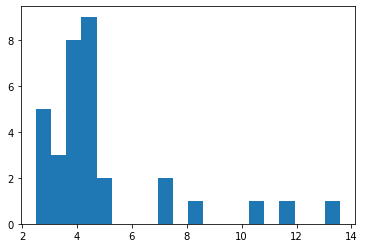

In [39]:
plt.hist(chr26_cn.values(), bins = 20)

In [40]:
#analyze shuffle permutations
# 60 in first (0.0508)

In [41]:
60/1180 * 100

5.084745762711865

In [42]:
permuted_1mb = [] 
os.chdir("shuffle_output/")
f = open("mischka_permutations.txt", 'rt')
inFile = f.readlines()
for line in inFile:
    line = line.rstrip()
    start_cent = 0
    e = open(line, 'rt')
    permute = e.readlines()
    for item in permute:
        item = item.rstrip().split()
        if int(item[1]) < 1000000:
            start_cent += 1
    permuted_1mb.append(start_cent / 1180)
os.chdir("..")

(array([  6.,   2.,  13.,  14.,  29.,  26.,  56.,  78.,  70.,  91.,  97.,
         88., 168.,  71.,  50.,  49.,  34.,  20.,  19.,  10.,   4.,   3.,
          1.,   0.,   1.]),
 array([0.00508475, 0.006     , 0.00691525, 0.00783051, 0.00874576,
        0.00966102, 0.01057627, 0.01149153, 0.01240678, 0.01332203,
        0.01423729, 0.01515254, 0.0160678 , 0.01698305, 0.01789831,
        0.01881356, 0.01972881, 0.02064407, 0.02155932, 0.02247458,
        0.02338983, 0.02430508, 0.02522034, 0.02613559, 0.02705085,
        0.0279661 ]),
 <BarContainer object of 25 artists>)

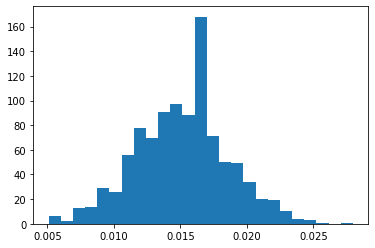

In [43]:
plt.hist(permuted_1mb, bins = 25)

In [44]:
min(permuted_1mb), max(permuted_1mb), stat.mean(permuted_1mb), stat.median(permuted_1mb)

(0.005084745762711864,
 0.027966101694915254,
 0.015125423728813559,
 0.015254237288135594)

In [45]:
((60/1180) - stat.mean(permuted_1mb)) / stat.stdev(permuted_1mb)

10.088266199841605